# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas

import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:

sensor.isna().sum()

#there are no nans

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
# Your code here:

print(sensor.shape[0], 'rows')
print(sensor.shape[1], 'columns')

1751 rows
12 columns


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:

timeseries = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=sensor.shape[0])

timeseries.shape

(1751,)

Assign the time series index to the dataframe's index.

In [7]:
# Your code here:

sensor.set_index(timeseries)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
2018-01-01 00:00:05,1.476302,-0.700807,0.669443,0.760912,0.644835,-0.072116,0.187742,-0.763656,0.226057,0.168241,0.145906,0.012455
2018-01-01 00:00:06,1.455153,-0.694408,0.662593,0.763300,0.639930,-0.088666,0.343096,-0.803820,0.278468,0.079382,-0.026344,-0.195590
2018-01-01 00:00:07,1.441702,-0.690710,0.656459,0.764380,0.637084,-0.099229,0.176202,-0.172756,0.056415,0.069360,0.072678,-0.102920
2018-01-01 00:00:08,1.443440,-0.691905,0.651196,0.763796,0.638005,-0.097803,0.274786,0.446585,-0.132766,0.072889,0.079921,-0.075323
2018-01-01 00:00:09,1.443071,-0.693039,0.638198,0.763042,0.638878,-0.097993,0.633672,0.316372,-0.115137,0.098347,-0.017021,-0.197310


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

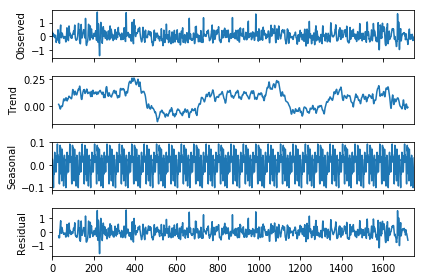

In [11]:
# Your code here:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq=60)
resplot=res.plot()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

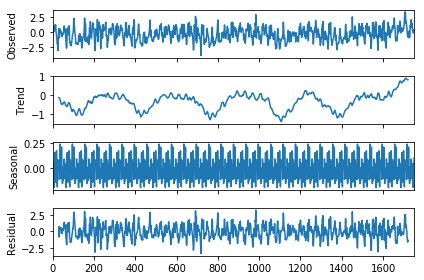

In [12]:
# Your code here:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq=60)
resplot=res.plot()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

In [14]:
from pandas.plotting import lag_plot

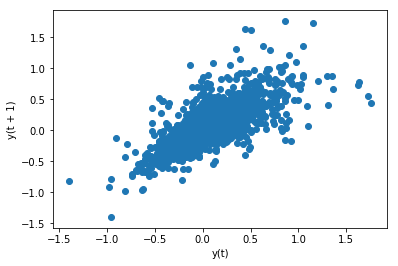

In [15]:
# Your code here:

lag_plot(sensor['userAcceleration.x'])

Create a lag plot for `rotationRate.x`

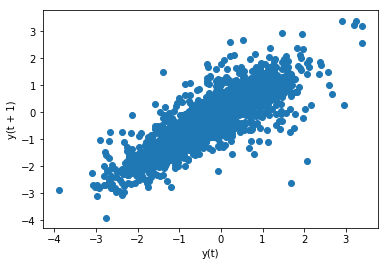

In [16]:
# Your code here:
lag_plot(sensor['rotationRate.x'])


What are your conclusions from both visualizations?

# Your conclusions here:

The visualizations show some linear pattern. 
The upwards angle suggests a positive correlation. The rotation rate seems more correlated than the user acceleration, but both seem correlated.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [17]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

res=adfuller(sensor['rotationRate.x'])
print('rotationRate')
print(f"ADF STATS: {res[0]}")
print(f"p-value: {res[1]}")
print('Critical Values:')
for i,j in res[4].items():
    print(f"\t {i}: {j}")
    

    
res=adfuller(sensor['userAcceleration.x'])
print('userAcceleration')
print(f"ADF STATS: {res[0]}")
print(f"p-value: {res[1]}")
print('Critical Values:')
for i,j in res[4].items():
    print(f"\t {i}: {j}")

rotationRate
ADF STATS: -5.269860625086412
p-value: 6.320230335912449e-06
Critical Values:
	 1%: -3.4341465551936534
	 5%: -2.863216966926812
	 10%: -2.567662770090317
userAcceleration
ADF STATS: -17.95799408616975
p-value: 2.823439483037483e-30
Critical Values:
	 1%: -3.434100824760071
	 5%: -2.863196780129223
	 10%: -2.5676520210882936


What are your conclusions from this test?

# Your conclusions here:
Our ADF Stats for both variables are smaller than the 1% critical value. This means we can reject the null hypothesis that states that the variables are not stationnary : the data is stationnary.

For both variables, the p value is < 0.05, which means we are over 95% confident in this conclusion.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [28]:
# Your code here:
train,test = sensor['userAcceleration.x'][:-10], sensor['userAcceleration.x'][-10:]

from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(sensor['userAcceleration.x'], order=(2, 1))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:     userAcceleration.x   No. Observations:                 1751
Model:                     ARMA(2, 1)   Log Likelihood                 379.399
Method:                       css-mle   S.D. of innovations              0.195
Date:                Thu, 20 Jun 2019   AIC                           -748.798
Time:                        16:01:00   BIC                           -721.458
Sample:                             0   HQIC                          -738.692
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0625      0.014      4.436      0.000       0.035       0.090
ar.L1.userAcceleration.x     0.9888      0.044     22.726      0.000       0.904       1.074
ar.L2.userAcceleration.x    -0.3788      0.037    -10.210      0.000      -0.451      -0.306
ma.L1.userAcceleration.x     0.1822      0.046      3.945      0.000       0.092       0.273
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3052           -0.9677j            1.6248           -0.1015
AR.2            1.3052           +0.9677j            1.6248            0.1015
MA.1           -5.4897           +0.0000j            5.4897            0.5000
-----------------------------------------------------------------------------
"""

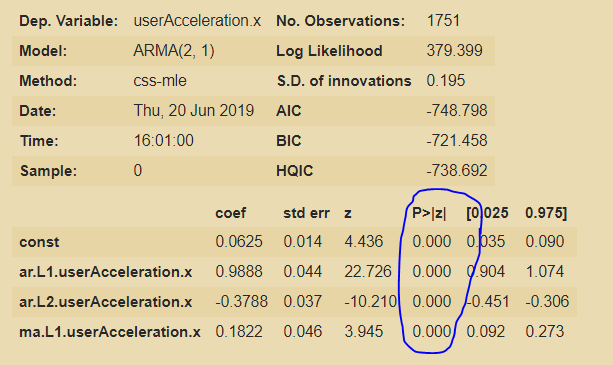

In [29]:
comparison = pd.DataFrame({'Actual':test, 'Pred':predictions})
comparison

,Actual,Pred
1741,0.149749,0.172776
1742,0.038461,0.115159
1743,-0.169175,-0.008270
1744,-0.300361,-0.186762
1745,-0.270174,-0.229211
1746,-0.268367,-0.136440
1747,-0.102444,-0.162658
1748,-0.085590,0.035719
1749,-0.048105,-0.043530
1750,-0.065011,0.008415


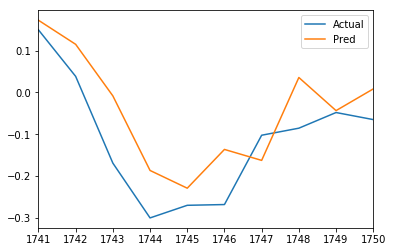

In [30]:
comparison.plot()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [35]:
# Your code here:
statsmodels.tools.eval_measures.rmse(test,predictions)

0.09383216939202793

In [38]:
statsmodels.tools.eval_measures.rmse(train,model_fit.predict(end=len(train)-1))

0.19523700570349387

In [41]:
test

1741    0.149749
1742    0.038461
1743   -0.169175
1744   -0.300361
1745   -0.270174
1746   -0.268367
1747   -0.102444
1748   -0.085590
1749   -0.048105
1750   -0.065011
Name: userAcceleration.x, dtype: float64